In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pandasql import sqldf
from sklearn.cluster import KMeans

In [236]:
class Data:
    def __init__(self, mts, tot, byn_sll):
        self.mts = mts
        self.tot = tot
        self.byn_sll = byn_sll

    def __str__(self):
        return 'mts : {}, tot : {}, byn_sll : {}'.format(self.mts, self.tot, self.byn_sll)

def complexToPolar(i):
    return np.arctan(i.imag/i.real), abs(i)
def polarToComplex(theta, r):
    x = r/((np.tan(theta)**2+1)**0.5)
    y = (r**2-x**2)**0.5
    return x+y*1j


In [237]:


cus_ifo = pd.read_csv("./cus_ifo.csv", header=0, usecols=['act_no', 'mts_mm_access_type', 'tot_ivs_te_sgm_cd', 'bas_stk_trd_tp_cd'])
cus_itg = pd.read_csv('./cus_itg_sct_bnc.csv', header=0, usecols=['act_no', 'itg_byn_cns_qty', 'itg_sll_cns_qty'])

cus_ifo['mts_mm_access_type'] = cus_ifo['mts_mm_access_type'].astype('string')
cus_ifo['act_no'] = cus_ifo['act_no'].astype('string')
cus_itg['act_no'] = cus_itg['act_no'].astype('string')

data_mts = {}
data_tot = {}
for row_i, row in cus_ifo.iterrows():
    if row_i > 0 and str(row['bas_stk_trd_tp_cd']) != '1' and str(row['bas_stk_trd_tp_cd']) != '2':
        data_mts[row['act_no']] = row['mts_mm_access_type'].count('1')/6
        tmp = row['tot_ivs_te_sgm_cd']
        if tmp == 99:
            tmp = 1
        data_tot[row['act_no']] = tmp/6

data_byn_sll = {}
for row_i, row in cus_itg.iterrows():
    if row_i > 0:
        byn = row['itg_byn_cns_qty']
        sll = row['itg_sll_cns_qty']
        if row['act_no'] in data_byn_sll:
            tmp = data_byn_sll[row['act_no']]
            data_byn_sll[row['act_no']] = tmp+byn+sll
        else:
            data_byn_sll[row['act_no']] = byn+sll
        

data_set = {}
for key in data_byn_sll:
    if key in data_mts and data_byn_sll[key] <= 10000:
        data_set[key] = Data(data_mts[key], data_tot[key], data_byn_sll[key]/10000)


In [238]:
mts_list = []
tot_list = []
byn_sll_list = []
for key in data_set.keys():
    mts_list.append(data_set[key].mts)
    tot_list.append(data_set[key].tot)
    byn_sll_list.append(data_set[key].byn_sll)

df = pd.DataFrame({'act_no':data_set.keys(), 'mts_mm_access_type':mts_list, 'tot_ivs_te_sgm_cd':tot_list, 'byn_sll':byn_sll_list})

In [239]:
df1=df['mts_mm_access_type'].value_counts()
df1

1.000000    5409
0.833333     977
0.500000     813
0.666667     809
0.333333     765
0.166667     723
Name: mts_mm_access_type, dtype: int64

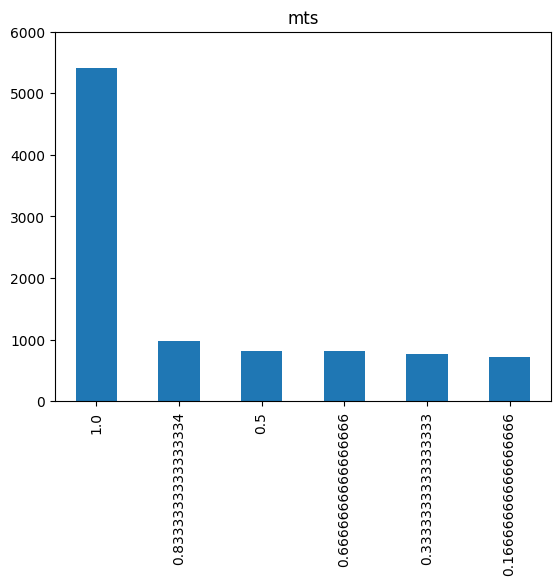

In [240]:
p1 = df1.plot(kind='bar', title='mts', yticks=range(0, 7000, 1000))

In [241]:
df1=df['tot_ivs_te_sgm_cd'].value_counts()
df1

0.500000    3826
0.166667    2927
0.333333    1390
0.666667     528
0.833333     419
1.000000     406
Name: tot_ivs_te_sgm_cd, dtype: int64

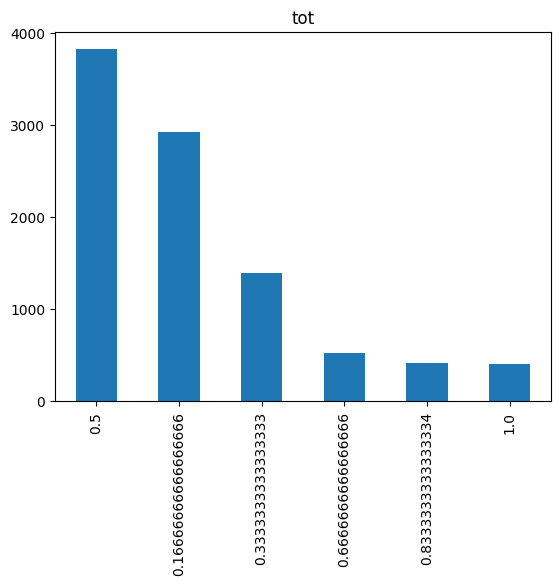

In [242]:
p1 = df1.plot(kind='bar', title='tot', yticks=range(0, 5000, 1000))

In [243]:
df1=df['byn_sll'].value_counts()
df1

0.0000    4345
0.0001     431
0.0002     287
0.0003     172
0.0004     112
          ... 
0.2927       1
0.8400       1
0.0654       1
0.9426       1
0.0663       1
Name: byn_sll, Length: 1545, dtype: int64

In [244]:
# p1 = df1.plot(kind='bar', title='byn_sll', yticks=range(0, 5000, 1000))
df['byn_sll']

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.0000
         ...  
9491    0.0000
9492    0.0000
9493    0.0000
9494    0.0007
9495    0.0002
Name: byn_sll, Length: 9496, dtype: float64

In [245]:
filt=df['byn_sll']>0
df.drop(index=df[-filt].index,inplace=True)
df

,act_no,mts_mm_access_type,tot_ivs_te_sgm_cd,byn_sll
5,73a63f06d98225d2153b45c6582e66a9e5fdcba3db1a4e...,1.000000,0.333333,0.1866
6,961e49a3c24a5afde7bbf0748050433da975af2f908bbc...,1.000000,0.333333,0.0006
9,a865b94a13738e48ee67e2215cb3a3f28701365cab8edc...,1.000000,0.666667,0.1895
12,2c9c62a0c7a1502f2a53d6ea2c3b7e1f8afd6087c3d73a...,1.000000,0.500000,0.2370
13,152576271df840a9e7af894df67ea4752051fe4ae80132...,1.000000,0.500000,0.1940
...,...,...,...,...
9485,73d69bbb83adfe1de0d430d4a1caae71b75874f7de3cf0...,1.000000,0.500000,0.0021
9489,1857f41615e73f88afb27fc937b44f72ab0d14c3723305...,0.833333,0.500000,0.0663
9490,ad707555c6eedc1183a0556fa2a41f1611ab2d23d99cf9...,0.666667,0.166667,0.0300
9494,14b6c2ef1b9f411b39bb88cc58bc11519545a2843a2046...,1.000000,0.333333,0.0007


<AxesSubplot: >

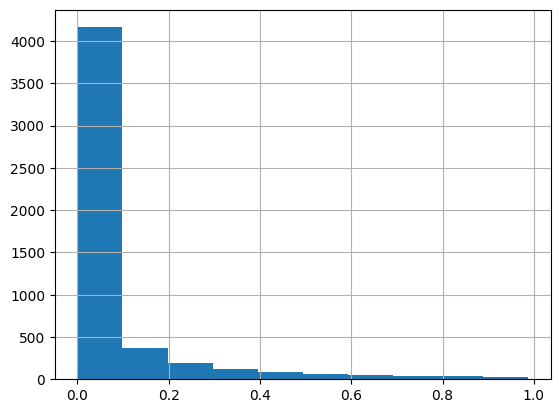

In [246]:
df['byn_sll'].hist()

In [247]:

base1 = 1j
base2 = -(3**0.5)*0.5+0.5j
base3 = (3**0.5)*0.5+0.5j

d1 = []
d2 = []
d3 = []
for data in data_set.values():
    d1.append(data.mts)
    d2.append(data.tot)
    d3.append(data.byn_sll)
bd = np.array([d1, d2, d3])
bd = bd.transpose()
dd = np.array([x[0]*base1+x[1]*base2+x[2]*base3 for x in bd])
dd1 = np.array([np.arctan(x.imag/(x.real+0.0001)) for x in dd])
dd2 = np.array([abs(x) for x in dd])



In [248]:
X = np.array(bd)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)



KMeans(n_clusters=2)

In [249]:
df = pd.DataFrame({'mts':bd[:,0], 'tot':bd[:,1], 'byn_sll':bd[:,2], 'group':kmeans.labels_})
df.to_csv('cluster.csv', mode='w')

print(kmeans.cluster_centers_)



[[0.95907217 0.47146476 0.05593063]
 [0.39790545 0.2898863  0.00548794]]


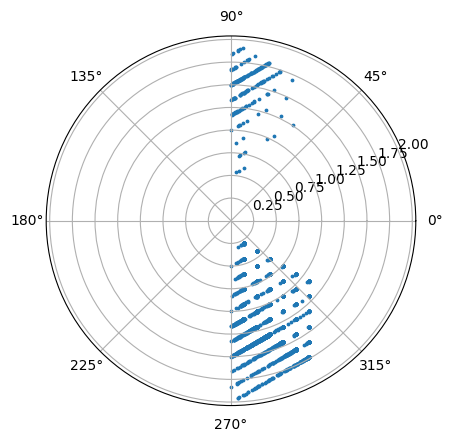

In [250]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(dd1, dd2, s=3)
plt.show()



0.9590721700690433 0.4714647593503203 0.05593063472276863
0.3979054458408138 0.2898862956313582 0.005487935368330317


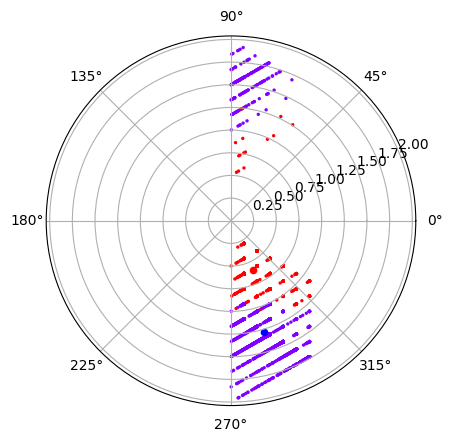

In [251]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.scatter(dd1, dd2, c=kmeans.labels_, cmap="rainbow", s=2)

c1 = kmeans.cluster_centers_[0][0]*base1+kmeans.cluster_centers_[0][1]*base2+kmeans.cluster_centers_[0][2]*base3
print(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2])

c2 = kmeans.cluster_centers_[1][0]*base1+kmeans.cluster_centers_[1][1]*base2+kmeans.cluster_centers_[1][2]*base3
print(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2])

ax.scatter(np.arctan(c1.imag/c1.real), abs(c1), c='blue', s=20)
ax.scatter(np.arctan(c2.imag/c2.real), abs(c2), c='red', s=20)
plt.show()



0.9590721700690433 0.4714647593503203 0.05593063472276863
0.3979054458408138 0.2898862956313582 0.005487935368330317


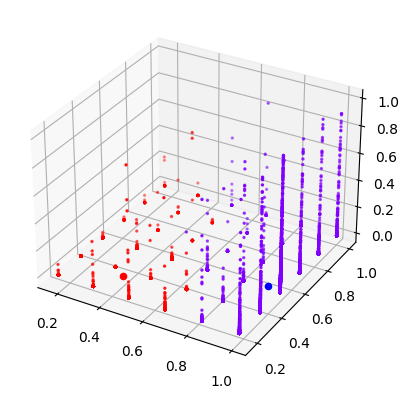

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d1, d2, d3, c=kmeans.labels_, cmap="rainbow", s=2)

print(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2])
print(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2])

ax.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][2], c='blue', s=20)
ax.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][2], c='red', s=20)
plt.show()



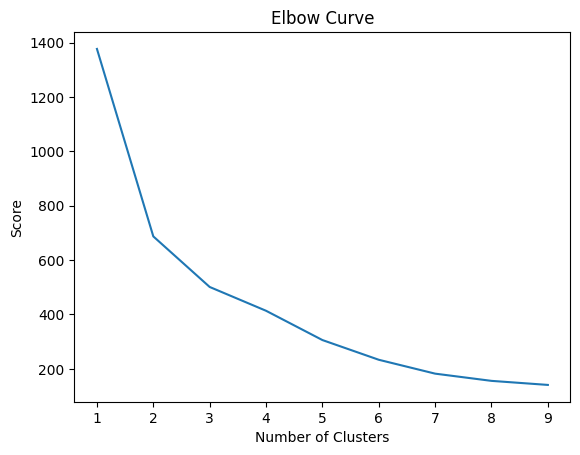

In [253]:
n_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(n_clusters, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [254]:
df = pd.read_csv("./cus_ifo.csv", header=0, usecols=[ 'mts_mm_access_type'])

In [255]:
df

,mts_mm_access_type
0,111111
1,111111
2,111111
3,111111
4,111111
...,...
59076,110100
59077,110100
59078,110100
59079,110100


In [256]:
df.rename(columns={'mts_mm_access_type':'mts'},inplace=True)
df

,mts
0,111111
1,111111
2,111111
3,111111
4,111111
...,...
59076,110100
59077,110100
59078,110100
59079,110100


In [257]:
df['mts']=df['mts'].apply(str)
df

,mts
0,111111
1,111111
2,111111
3,111111
4,111111
...,...
59076,110100
59077,110100
59078,110100
59079,110100


In [258]:
df['mts']=df['mts'].str.count('1')

In [259]:
df

,mts
0,6
1,6
2,6
3,6
4,6
...,...
59076,3
59077,3
59078,3
59079,3


In [260]:
df1=df['mts'].value_counts()
df1

6    35265
5     5899
4     4801
3     4695
2     4365
1     4056
Name: mts, dtype: int64

In [261]:
df1.info

<bound method Series.info of 6    35265
5     5899
4     4801
3     4695
2     4365
1     4056
Name: mts, dtype: int64>

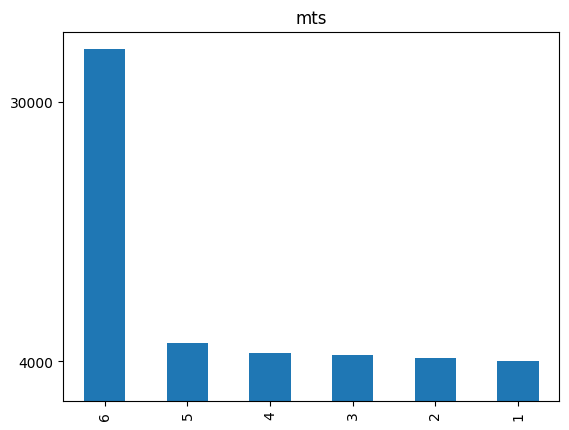

In [262]:
p1 = df1.plot(kind='bar', title='mts', yticks=[4000,30000])

In [263]:
df = pd.read_csv("./cus_ifo.csv", header=0, usecols=['tot_ivs_te_sgm_cd'])
df

,tot_ivs_te_sgm_cd
0,3
1,3
2,3
3,3
4,3
...,...
59076,1
59077,1
59078,1
59079,1


In [264]:
df.rename(columns={'tot_ivs_te_sgm_cd':'tot'},inplace=True)
df

,tot
0,3
1,3
2,3
3,3
4,3
...,...
59076,1
59077,1
59078,1
59079,1


In [265]:
filt=df['tot']<7
df.drop(index=df[-filt].index,inplace=True)
df

,tot
0,3
1,3
2,3
3,3
4,3
...,...
59076,1
59077,1
59078,1
59079,1


In [266]:
df1=df['tot'].value_counts()
df1

3    24372
1    16888
2     8731
4     3554
5     2792
6     2719
Name: tot, dtype: int64

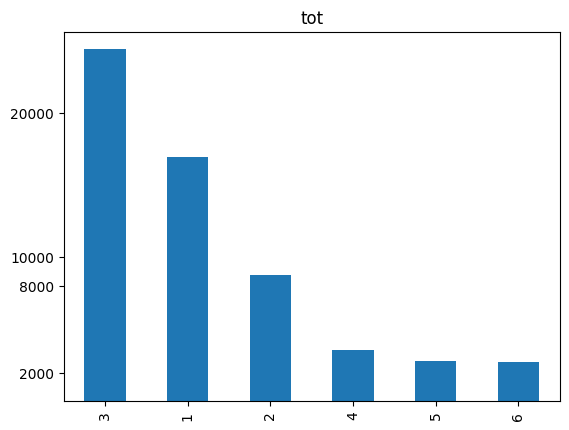

In [267]:
p1 = df1.plot(kind='bar', title='tot', yticks=[2000,8000,10000,20000])

In [268]:
df = pd.read_csv("./cus_itg_sct_bnc.csv", header=0, usecols=['act_no','itg_byn_cns_qty', 'itg_sll_cns_qty'])
df

,act_no,itg_byn_cns_qty,itg_sll_cns_qty
0,e97920ce7d2205d876398178d56a854ebe6aa84f46a9ff...,0.0,0.0
1,e97920ce7d2205d876398178d56a854ebe6aa84f46a9ff...,0.0,341.0
2,e97920ce7d2205d876398178d56a854ebe6aa84f46a9ff...,0.0,32.0
3,e97920ce7d2205d876398178d56a854ebe6aa84f46a9ff...,0.0,0.0
4,e97920ce7d2205d876398178d56a854ebe6aa84f46a9ff...,0.0,0.0
...,...,...,...
366792,8a302c32df0a3110af9fea8285cb720cfba9cd57b87123...,0.0,0.0
366793,8a302c32df0a3110af9fea8285cb720cfba9cd57b87123...,0.0,0.0
366794,8a302c32df0a3110af9fea8285cb720cfba9cd57b87123...,0.0,0.0
366795,8a302c32df0a3110af9fea8285cb720cfba9cd57b87123...,2.0,0.0


In [269]:
df=df.groupby('act_no').sum()
df

,itg_byn_cns_qty,itg_sll_cns_qty
act_no,,
0000b53f15d9484a62a745bdb02cd5f27796ba07c1bddcb7732a43401ae87240,0.0,2.0
00086aa946369d1c75182dffd43bd4a34f3abc1ddeba03de7cc04ebe4604ae14,49183.0,72548.0
0013250ee6bc012ce49a9eae6929a65cf50a1844c564de4f1bf2f09e13518ce7,0.0,0.0
002f84a03e2b6300db16322799882cc6b7201022b62fc9b10058e005438b28e9,0.0,0.0
0036c57441034bbb6b5a9618d3ff6a1ec9734b78327c7e55adb9527163350c1e,0.0,0.0
...,...,...
ffd96d859770d62800f6f654fce913c50f9cbf809efcc8dfeff739ce3ff6376e,0.0,1.0
ffdb8a101b04d93c8b09ddce17a7be84d0179908f3f4cc0cea2ad73e668bc54c,0.0,23.0
ffe9a305443270d8c90b0c1eb100ea90699f4fcbaaf7273580f0248176a73245,0.0,2.0


In [270]:
df['sum']=df['itg_byn_cns_qty']+df['itg_sll_cns_qty']

In [271]:
df

,itg_byn_cns_qty,itg_sll_cns_qty,sum
act_no,,,
0000b53f15d9484a62a745bdb02cd5f27796ba07c1bddcb7732a43401ae87240,0.0,2.0,2.0
00086aa946369d1c75182dffd43bd4a34f3abc1ddeba03de7cc04ebe4604ae14,49183.0,72548.0,121731.0
0013250ee6bc012ce49a9eae6929a65cf50a1844c564de4f1bf2f09e13518ce7,0.0,0.0,0.0
002f84a03e2b6300db16322799882cc6b7201022b62fc9b10058e005438b28e9,0.0,0.0,0.0
0036c57441034bbb6b5a9618d3ff6a1ec9734b78327c7e55adb9527163350c1e,0.0,0.0,0.0
...,...,...,...
ffd96d859770d62800f6f654fce913c50f9cbf809efcc8dfeff739ce3ff6376e,0.0,1.0,1.0
ffdb8a101b04d93c8b09ddce17a7be84d0179908f3f4cc0cea2ad73e668bc54c,0.0,23.0,23.0
ffe9a305443270d8c90b0c1eb100ea90699f4fcbaaf7273580f0248176a73245,0.0,2.0,2.0


In [272]:
df.drop(columns=['itg_byn_cns_qty', 'itg_sll_cns_qty'])

,sum
act_no,
0000b53f15d9484a62a745bdb02cd5f27796ba07c1bddcb7732a43401ae87240,2.0
00086aa946369d1c75182dffd43bd4a34f3abc1ddeba03de7cc04ebe4604ae14,121731.0
0013250ee6bc012ce49a9eae6929a65cf50a1844c564de4f1bf2f09e13518ce7,0.0
002f84a03e2b6300db16322799882cc6b7201022b62fc9b10058e005438b28e9,0.0
0036c57441034bbb6b5a9618d3ff6a1ec9734b78327c7e55adb9527163350c1e,0.0
...,...
ffd96d859770d62800f6f654fce913c50f9cbf809efcc8dfeff739ce3ff6376e,1.0
ffdb8a101b04d93c8b09ddce17a7be84d0179908f3f4cc0cea2ad73e668bc54c,23.0
ffe9a305443270d8c90b0c1eb100ea90699f4fcbaaf7273580f0248176a73245,2.0


In [273]:
df.reset_index(drop=True,inplace=True)
df

,itg_byn_cns_qty,itg_sll_cns_qty,sum
0,0.0,2.0,2.0
1,49183.0,72548.0,121731.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
9995,0.0,1.0,1.0
9996,0.0,23.0,23.0
9997,0.0,2.0,2.0
9998,0.0,0.0,0.0


In [274]:
df.drop(columns=['itg_byn_cns_qty', 'itg_sll_cns_qty'],inplace=True)

In [275]:
df

,sum
0,2.0
1,121731.0
2,0.0
3,0.0
4,0.0
...,...
9995,1.0
9996,23.0
9997,2.0
9998,0.0


In [276]:
filt=df['sum']<2000
df.drop(index=df[-filt].index,inplace=True)
df

,sum
0,2.0
2,0.0
3,0.0
4,0.0
5,187.0
...,...
9995,1.0
9996,23.0
9997,2.0
9998,0.0


<AxesSubplot: >

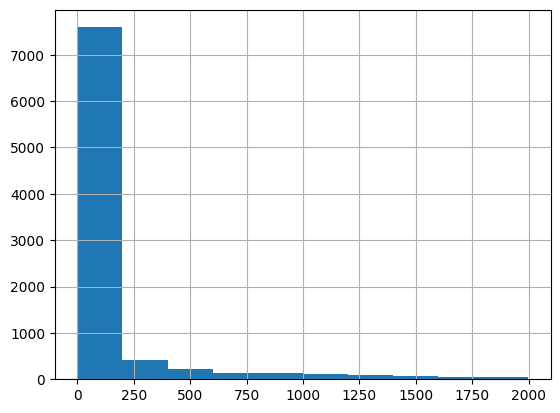

In [277]:
df['sum'].hist()